# <ins>Content Strategies for CS-Streaming</ins>

### Exploring the Netflix Dataset:
Netflix is one of the world's largest streaming platforms, with millions of users streaming movies and TV shows every day. As a result, Netflix has accumulated a massive amount of data that can be used to gain insights into user behaviour, preferences, and more. In this project, students will explore a dataset containing information about movies and TV shows available on Netflix.

### Brief:
The CEO of CS-Streaming has brought you and your team in to analyse Netflix data for their new streaming service. They are confident that your analysis will be helpful to you in making decisions about their service. They need your expertise to uncover trends and insights from the Netflix data that will be beneficial to their new product. They are eager to begin this project and will therefore need a timely response.

You are to report on how CS-Streaming can best optimise its services and compete with Netflix.

## <ins>Task</ins>

### About the Dataset:
The dataset is available [here](https://www.kaggle.com/datasets/shivamb/netflix-shows).

This tabular dataset encompasses a comprehensive listing of all the movies and TV shows available on Netflix, providing intricate details such as cast, directors, ratings, release year, duration, and more. 

### Key Columns in the Dataset:
1. `show_id`: An exclusive identifier for each show on Netflix.
2. `type`: Indicates whether the entry is a "Movie" or a "TV Show."
3. `title`: The name of the movie or TV show.
4. `director`: The director(s) responsible for the movie or TV show.
5. `cast`: The principal cast or actors featured in the movie or TV show.
6. `country`: The country or countries where the movie or TV show was produced.
7. `date_added`: The date when the movie or TV show was added to the Netflix catalogue.
8. `release_year`: The original release year of the movie or TV show.
9. `rating`: The content rating assigned to the movie or TV show (e.g., PG, TV-MA, etc.).
10. `duration`: For movies, the duration is in minutes; for TV shows, the number of seasons.
11. `listed_in`: The genre(s) or category(ies) classifying the movie or TV show.
12. `description`: A concise summary of the movie or TV show.

---------------

### Importing the data:

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('data/netflix_titles.csv')

In [65]:
# having a look at the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


---------------------
### Data Cleaning:

In [67]:
# copying data to maintain the original dataset
df_netflix = df.copy()

In [68]:
# correcting date format
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'])

In [69]:
# checking the nulls in the data
print(df_netflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [70]:
# the date column contains some nulls, and these cannot be replaced with any other values, so they will be removed
df_netflix.dropna(subset=['date_added'], inplace=True)

In [71]:
# extracting the month and year
df_netflix['month'] = df_netflix['date_added'].dt.month
df_netflix['year'] = df_netflix['date_added'].dt.year
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


In [72]:
#filling in the remaining nulls with "Unknown"
df_netflix[['director', 'cast', 'country', 'rating', 'duration']] = \
df_netflix[['director', 'cast', 'country', 'rating', 'duration']].fillna('Unknown')

In [73]:
# changing 'listed_in' to 'genre' for better readability
df_netflix.rename(columns={'listed_in': 'genre'}, inplace=True)

In [74]:
# reordering after the new columns for better readability
df_netflix = df_netflix[['show_id', 'type','title', 'director', 'cast', 'country', 'date_added', 'month', 'year', 'release_year', \
         'rating', 'duration', 'genre', 'description']]

In [75]:
# checking for duplicates
print(df_netflix.duplicated().sum())

0


In [76]:
df_netflix['rating'].value_counts() 
# some of the values should be in the 'duration' column instead

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [77]:
# gathering the indexes for these values
text = ['74 min', '84 min', '66 min']
for i in text:
    row_index = df_netflix[df_netflix['rating'] == i].index[0]
    print(f'{i} is in the row {row_index}.')

74 min is in the row 5541.
84 min is in the row 5794.
66 min is in the row 5813.


In [78]:
#replacing the values with "Unkown"
df_netflix.loc[5541, 'rating'] = 'Unknown'
df_netflix.loc[5794, 'rating'] = 'Unknown'
df_netflix.loc[5813, 'rating'] = 'Unknown'

# adding the values to the correct column
df_netflix.loc[5541, 'duration'] = '74 min'
df_netflix.loc[5794, 'duration'] = '84 min'
df_netflix.loc[5813, 'duration'] = '66 min'

In [79]:
df_netflix.info() # no more nulls, columns are in the correct format and data has been cleaned

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   month         8797 non-null   int64         
 8   year          8797 non-null   int64         
 9   release_year  8797 non-null   int64         
 10  rating        8797 non-null   object        
 11  duration      8797 non-null   object        
 12  genre         8797 non-null   object        
 13  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1.3+ MB


## Exploratory Data Analysis
----------------------

### Content Types:

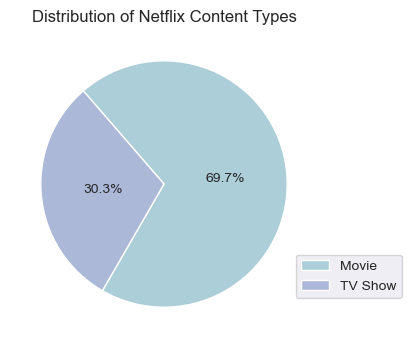

In [80]:
#looking at the types of content Netflix has the offer
type_count = df_netflix['type'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(type_count, autopct='%1.1f%%', startangle=240, colors=['#ABCED8', '#ABB8D8'], \
        pctdistance=0.5, textprops={'fontsize': 10})
plt.title('Distribution of Netflix Content Types')
plt.legend(labels=type_count.index, loc="center", bbox_to_anchor=(1.1, 0.2), fontsize=10)

plt.show()

In [81]:
#spliting dataframe into Movies and TV Shows
movies = df_netflix[df_netflix['type'] == 'Movie'].copy()
tvshows = df_netflix[df_netflix['type'] == 'TV Show'].copy()

### In this notebook, Movies will be analysed.
-----------------------------
### Movies by Year:

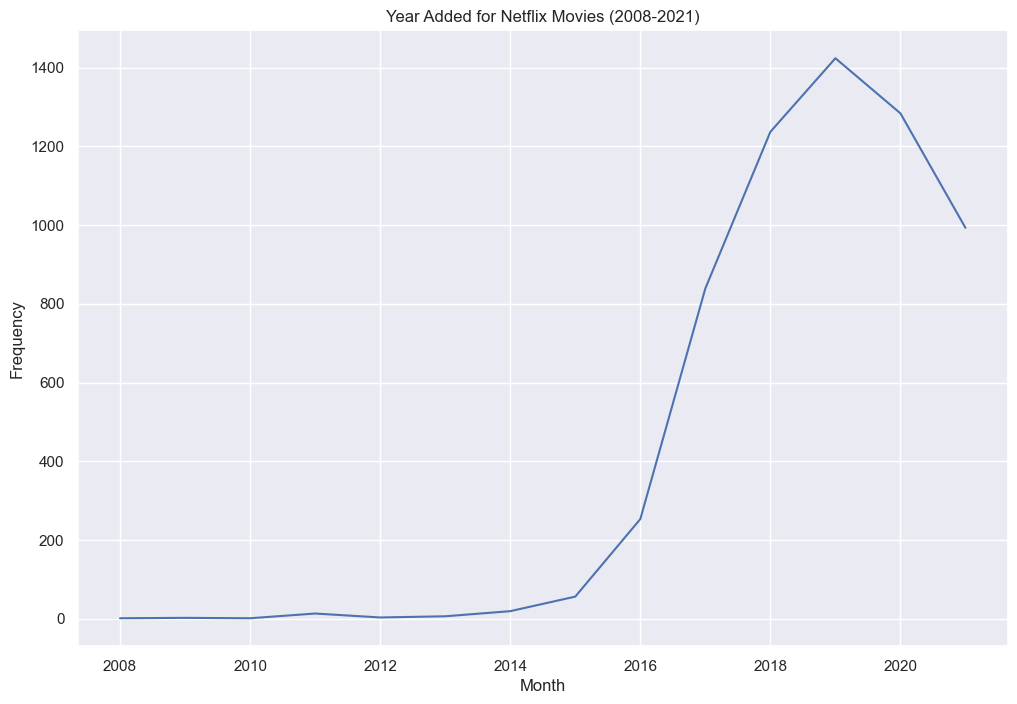

In [82]:
# understanding which years most of the data orginates from
movies_year_count = movies['year'].value_counts()
movie_year = sns.lineplot(x = movies_year_count.index, y=movies_year_count)
sns.set(rc = {'figure.figsize':(12, 4)})
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Year Added for Netflix Movies (2008-2021)')
plt.show()

### 2015 onwards is where there was most prominent activity for Movies.

In [83]:
movies_year_count

2019    1424
2020    1284
2018    1237
2021     993
2017     839
2016     253
2015      56
2014      19
2011      13
2013       6
2012       3
2009       2
2008       1
2010       1
Name: year, dtype: int64

### TV Show Duration:

In [109]:
# looking into the duration of TV Shows during these years
movies['duration'].value_counts()

90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [86]:
# extracting only the integers from the 'duration' column
movies['minutes'] = movies['duration'].str[:-4].astype(int)

# gathering min and max to understand what ranges to use for the next part
min_movie_len = movies['minutes'].min()
max_movie_len = movies['minutes'].max()

print(f'The shortest movie is {min_movie_len} minutes.' + '\n' + f'The longest movie is {max_movie_len} minutes.')

The shortest movie is 3 minutes.
The longest movie is 312 minutes.


In [87]:
# creating ranges for the duration of the movies so it is easier to group and visualise
for index, row in movies.iterrows():
    minutes = row['minutes']
    if minutes <= 30:
        movies.at[index, 'duration_range'] = "<= 30"
    elif 30 < minutes <= 60:
        movies.at[index, 'duration_range'] = "30-60"
    elif 60 < minutes <= 90:
        movies.at[index, 'duration_range'] = "60-90"
    elif 90 < minutes <= 120:
        movies.at[index, 'duration_range'] = "90-120"
    elif 120 < minutes <= 180:
        movies.at[index, 'duration_range'] = "120-180"
    elif 180 < minutes <= 240:
        movies.at[index, 'duration_range'] = "180-240"
    else:
        movies.at[index, 'duration_range'] = "> 240"

In [88]:
#counts for each category created
movies['duration_range'].value_counts()

90-120     2996
60-90      1506
120-180    1095
30-60       357
<= 30       130
180-240      44
> 240         3
Name: duration_range, dtype: int64

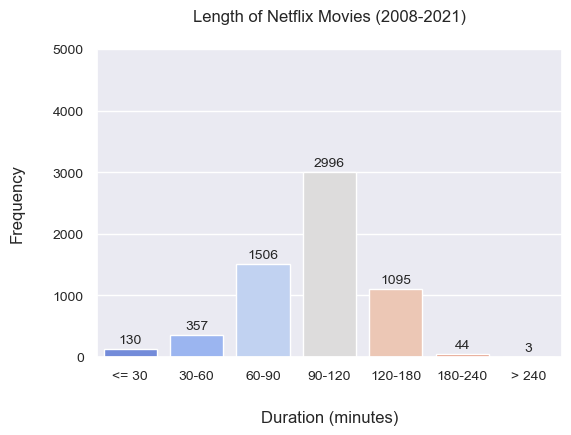

In [107]:
#plotting movie duration ranges:
duration_order = ['<= 30', '30-60', '60-90', '90-120', '120-180', '180-240', \
                  '> 240']

duration_movie_count = movies['duration_range'].value_counts()
duration_bar = sns.barplot(x=duration_movie_count.index, y=duration_movie_count, order=duration_order, palette='coolwarm')
sns.set(rc={'figure.figsize': (6, 4)})
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Duration (minutes)', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.ylim(0, 5000)
plt.title('Length of Netflix Movies (2008-2021)', fontsize=12, pad=20)

# Loop over duration_order
for index, duration in enumerate(duration_order):
    value = duration_movie_count.get(duration, 0)  # Get count from duration_movie_count
    plt.text(index, value + 100, str(value), ha='center', fontsize=10)

plt.show()

### TV Show Genres:

In [90]:
# splitting listed genres into individual genres
genres_movies = movies['genre'].str.split(', ').explode()
genres_count = genres_movies.value_counts()
genres_count

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: genre, dtype: int64

In [91]:
# picking top genres which are not country-specific/ international (generic genres)
wanted_movie_genres = ('Dramas', 'Comedies', 'Documentaries', 'Action & Adventure', 'Independent Movies','Children & Family Movies',
    'Romantic Movies', 'Thrillers', 'Music & Musicals', 'Horror Movies')
filtered = genres_movies[genres_movies.isin(wanted_movie_genres)]
filtered_genre_count = pd.DataFrame(filtered.value_counts())
filtered_genre_count.rename(columns={'genre': 'count'}, inplace=True)
filtered_genre_count['percentage'] = round((filtered_genre_count['count'] / filtered_genre_count['count'].sum()) * 100, 2)
filtered_genre_count

,count,percentage
Dramas,2427,26.52
Comedies,1674,18.29
Documentaries,869,9.50
Action & Adventure,859,9.39
Independent Movies,756,8.26
Children & Family Movies,641,7.00
Romantic Movies,616,6.73
Thrillers,577,6.31
Music & Musicals,375,4.10
Horror Movies,357,3.90


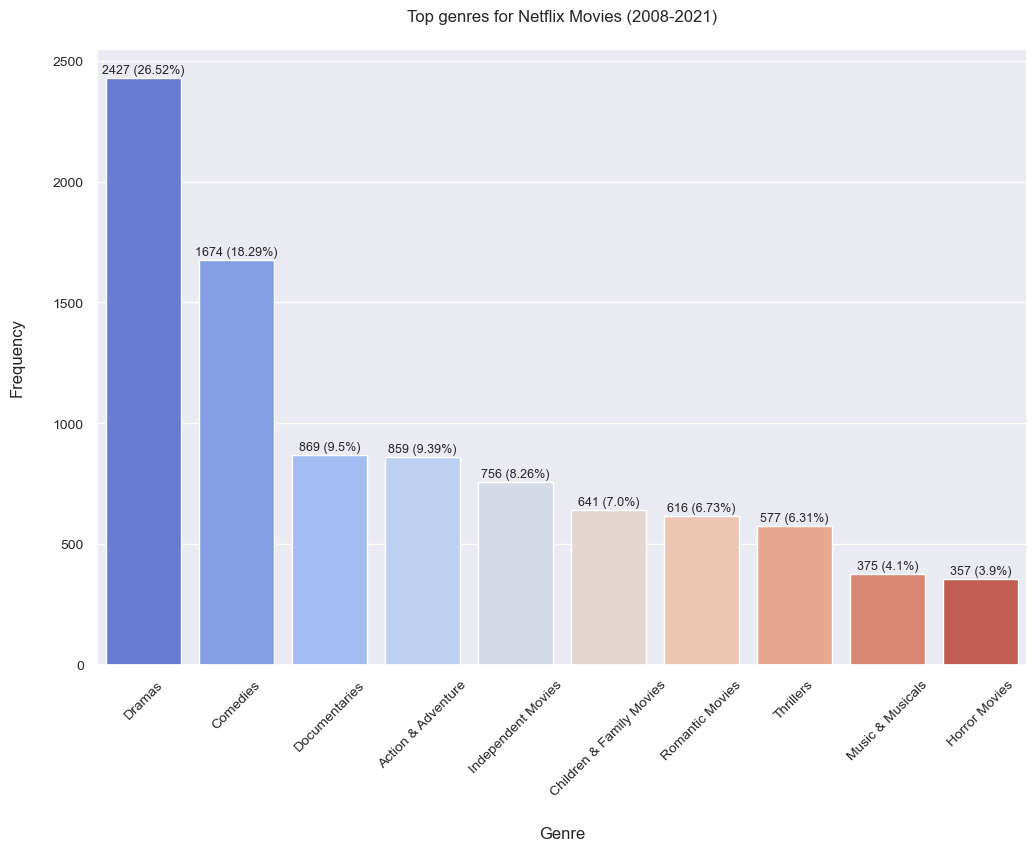

In [62]:
#plotting barplot
top_genres = sns.barplot(x = filtered_genre_count['count'].index, y=filtered_genre_count['count'], palette='coolwarm')
sns.set(rc = {'figure.figsize':(12, 8)})
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Genre', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.title('Top genres for Netflix Movies (2008-2021)', fontsize=12, pad=20)

for bar, count, percentage in zip(top_genres.patches, filtered_genre_count['count'], filtered_genre_count['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, f"{count} ({percentage}%)", ha='center', fontsize=9)

plt.show()

### Top Countries for TV Shows:

In [92]:
#filtering for top 10 countries
country_stats_movie = pd.DataFrame(movies[movies['country'] != 'Unknown']['country'].value_counts())
country_stats_movie.rename(columns={'country': 'count'}, inplace=True)
country_stats_movie['percentage'] = round((country_stats_movie['count'] / country_stats_movie['count'].sum()) * 100, 2)
top_10_countries = country_stats_movie.head(10)
top_10_countries

,count,percentage
United States,2058,36.16
India,893,15.69
United Kingdom,206,3.62
Canada,122,2.14
Spain,97,1.70
Egypt,92,1.62
Nigeria,86,1.51
Indonesia,77,1.35
Turkey,76,1.34
Japan,76,1.34


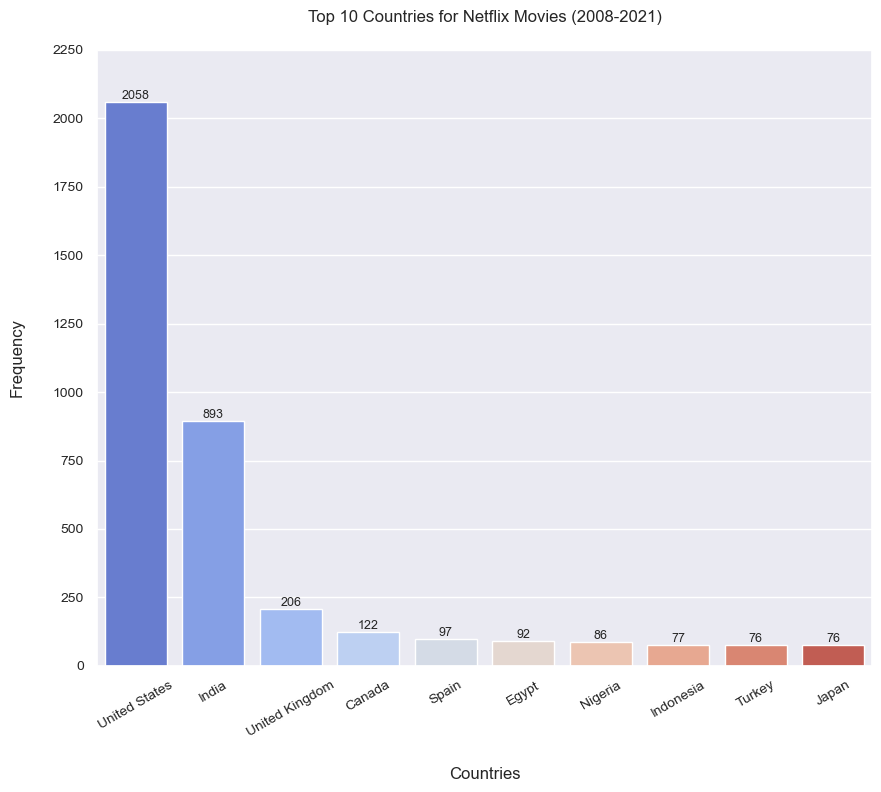

In [129]:
# plotting top 10 countries
top_10_countries_bar = sns.barplot(x = top_10_countries['count'].index, y=top_10_countries['count'], palette='coolwarm')
sns.set(rc = {'figure.figsize':(10, 8)})
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Countries', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.ylim(0, 2250)
plt.title('Top 10 Countries for Netflix Movies (2008-2021)', fontsize=12, pad=20)

for bar in top_10_countries_bar.patches:
    height = bar.get_height()
    top_10_countries_bar.text(bar.get_x() + bar.get_width() / 2, height, 
                              f'{height:.0f}', 
                              ha='center', va='bottom', fontsize=9)

plt.show()

### Time Series with top genres and countries:

In [94]:
movies_new_df = pd.DataFrame({'month': movies['month'], 'year': movies['year'], 'genre': genres_movies, 'country': movies['country']})
movies_new_df = movies_new_df[movies_new_df['country'] != 'Unknown'] # drop unknown countries
movies_new_df['month'] = movies_new_df['month'].astype(int) # change to integers
movies_new_df['year'] = movies_new_df['year'].astype(int) # change to integers

# Filter for top 5 wanted genres

filtered_movies_new_df = movies_new_df[movies_new_df['genre'].isin(wanted_movie_genres)]

# Filter for top 10 countries
top_movie_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'Spain', 'Egypt', 'Nigeria', 'Indonesia', 'Turkey', 'Japan']
top_country_genre_movies = filtered_movies_new_df[filtered_movies_new_df['country'].isin(top_movie_countries)]

# Display the DataFrame
top_country_genre_movies

,month,year,genre,country
0,9,2021,Documentaries,United States
9,9,2021,Comedies,United States
9,9,2021,Dramas,United States
24,9,2021,Comedies,India
24,9,2021,Romantic Movies,India
...,...,...,...,...
8804,11,2019,Horror Movies,United States
8805,1,2020,Children & Family Movies,United States
8805,1,2020,Comedies,United States
8806,3,2019,Dramas,India


### Country by Year:

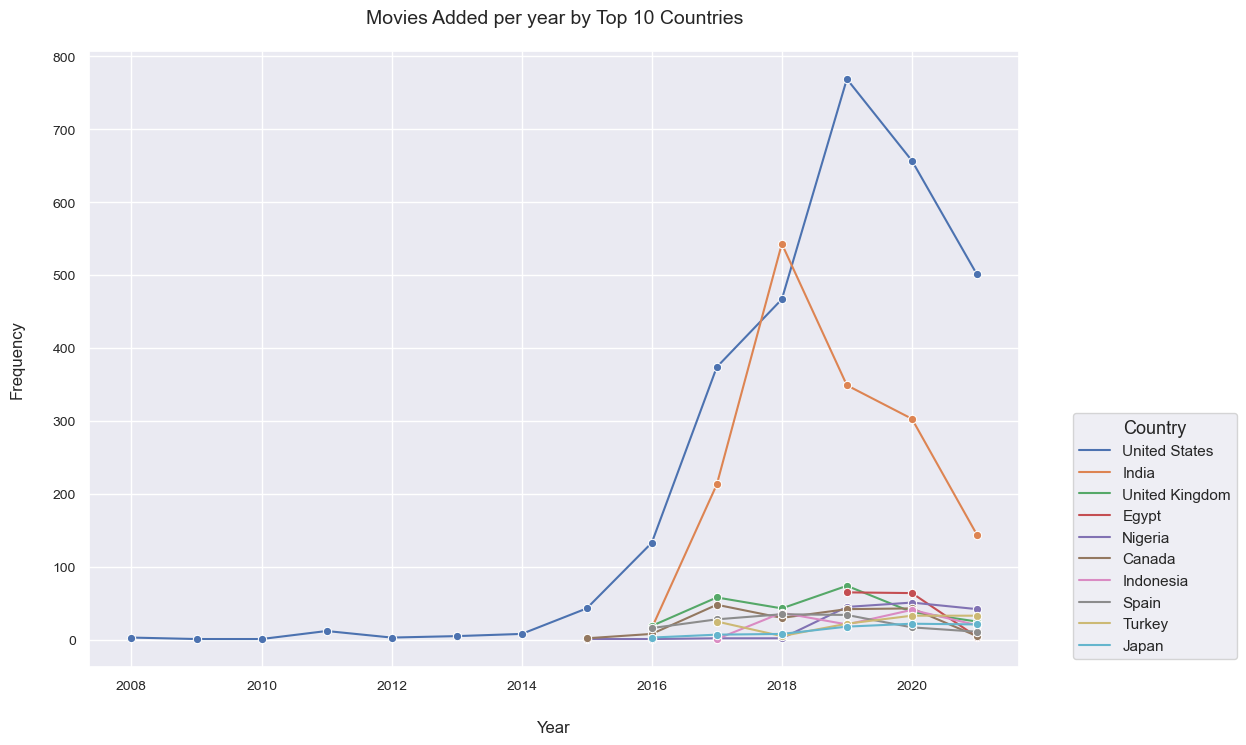

In [95]:
# year by country count
year_by_country = top_country_genre_movies.groupby(['year', 'country'])\
                  .size().reset_index(name='count').sort_values(by='count', ascending=False)

year_country_line = sns.lineplot(x='year', y='count', hue='country', data=year_by_country, marker='o')

sns.set(rc = {'figure.figsize':(6, 8)})
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.title('Movies Added per year by Top 10 Countries', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left',title='Country', title_fontsize='13')
plt.show()

### From the line graph above, we can see that there are a number of non-English speaking countries that are quite popular - noteably these are South Korea, Japan, India and France. There have been huge increases in content added from 2018 onwards, so gathering the percentage change of these countries will help determine if international TV Shows should be considered.

### Genre by Year:

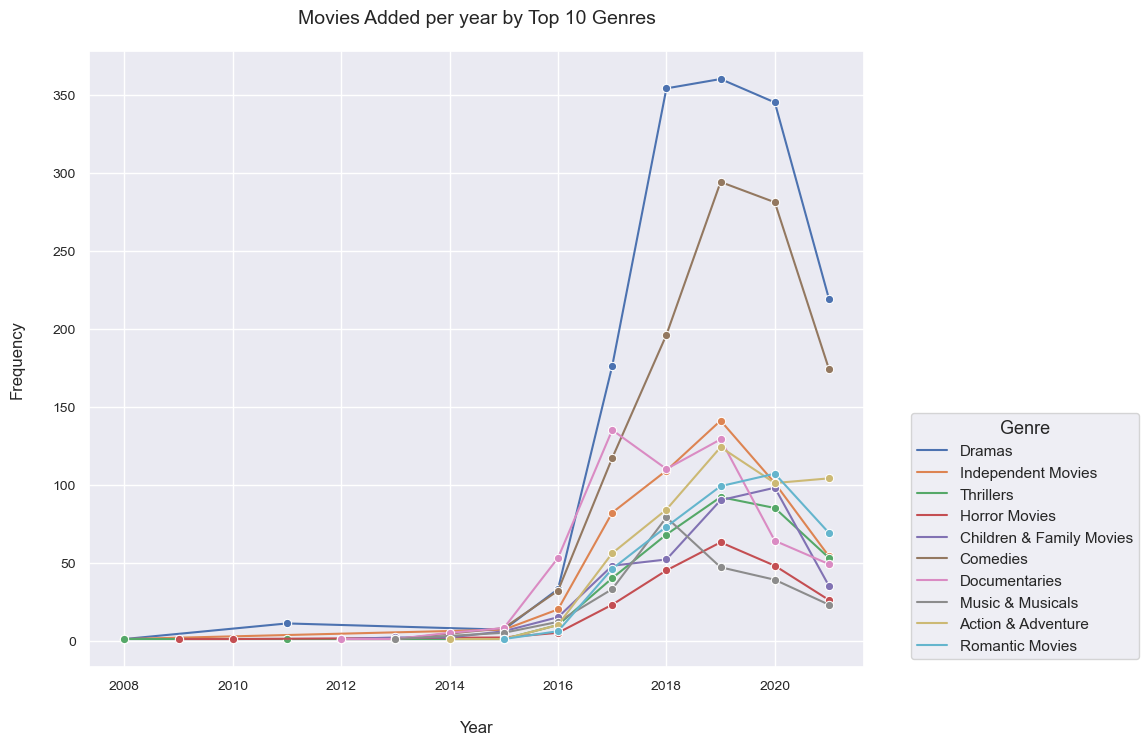

In [130]:
# year by genre
year_by_genre = top_country_genre_movies.groupby(['year', 'genre']).size().reset_index(name='count')
year_by_genre

year_genre_line = sns.lineplot(x='year', y='count', hue='genre', data=year_by_genre, marker='o')

sns.set(rc = {'figure.figsize':(8, 3)})
plt.xticks(rotation='horizontal', fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.title('Movies Added per year by Top 10 Genres', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left',title='Genre', title_fontsize='13')
plt.show()

### Genre by Month:

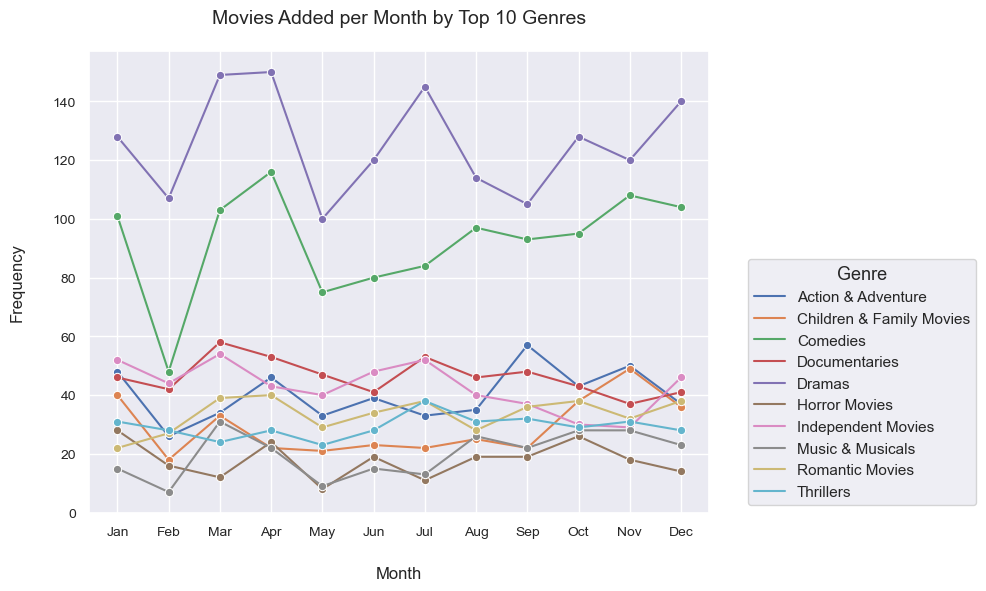

In [132]:
# month by genre
month_by_genre = top_country_genre_movies.groupby(['month', 'genre']).size().reset_index(name='count')

month_genre_line = sns.lineplot(x='month', y='count', hue='genre', data=month_by_genre, marker='o')

sns.set(rc = {'figure.figsize':(8, 6)})
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Month', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)

#for better readability
month_genre_line.set_xticks(range(1, 13))
month_genre_line.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

plt.title('Movies Added per Month by Top 10 Genres', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left',title='Genre', title_fontsize='13')
plt.show()

In [98]:
month_by_genre.groupby('month')['count'].sum().sort_values(ascending=False)

month
4     544
3     537
1     511
12    507
11    502
10    498
7     489
9     471
8     461
6     447
5     385
2     363
Name: count, dtype: int64

### Top 10 Actors per Country:
As the cast actors are all listed, it is more helpful to split and stack them so they can be grouped more efficently:

In [99]:
def top_10_actors_by_country(df, country, n=10):
    df_country = df[df['country'] == country].copy()
    df_country = df_country[df_country != 'Unknown'].dropna()
    all_actors = df_country['cast'].str.split(', ').explode()
    actors_count = pd.DataFrame(all_actors.value_counts())
    actors_count.rename(columns={'cast': 'count'}, inplace=True)
    actors_count['percentage'] = round((actors_count / df_country.shape[0]) * 100, 2)
    top_10_actors = actors_count.head(n)
    return top_10_actors

In [117]:
top_10_US_actors_movies = top_10_actors_by_country(movies, 'United States', 5)
top_10_US_actors_movies

,count,percentage
Adam Sandler,20,1.10
Samuel L. Jackson,18,0.99
Laura Bailey,14,0.77
Nicolas Cage,13,0.71
James Franco,13,0.71


In [118]:
top_10_UK_actors_movies = top_10_actors_by_country(movies, 'United Kingdom', 5)
top_10_UK_actors_movies

,count,percentage
Eric Idle,7,4.27
Terry Gilliam,7,4.27
Terry Jones,7,4.27
Michael Palin,7,4.27
John Cleese,7,4.27


In [119]:
top_10_egypt_actors_movies = top_10_actors_by_country(movies, 'Egypt', 5)
top_10_egypt_actors_movies

,count,percentage
Hassan Hosny,13,14.44
Ahmed Helmy,13,14.44
Mohammed Tharwat,8,8.89
Bayoumi Fouad,7,7.78
Lotfy Labib,7,7.78


In [120]:
top_10_nigeria_actors_movies = top_10_actors_by_country(movies, 'Nigeria', 5)
top_10_nigeria_actors_movies

,count,percentage
Blossom Chukwujekwu,11,13.10
Ramsey Nouah,10,11.90
Tina Mba,10,11.90
Toyin Abraham,9,10.71
Joke Silva,8,9.52


In [121]:
top_10_nigeria_actors_movies = top_10_actors_by_country(movies, 'Canada', 5)
top_10_nigeria_actors_movies

,count,percentage
Robb Wells,10,9.62
John Paul Tremblay,10,9.62
John Dunsworth,8,7.69
Mike Smith,7,6.73
Patrick Roach,5,4.81


### Count of Rating Categories:

In [105]:
movies['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
Unknown        5
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Distribution of age ratings for Netflix Movies')

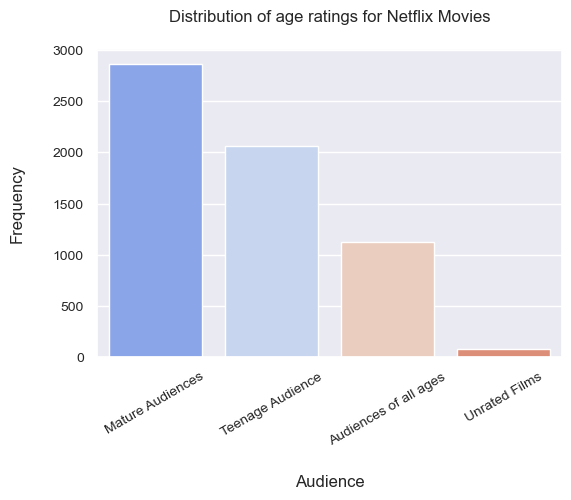

In [114]:
rating_count = movies['rating'].value_counts()

#group them and plot
ratings_list = [(rating_count['TV-MA'] + rating_count['R'] + rating_count['NC-17']), \
               (rating_count['TV-14'] + rating_count['PG-13'] + rating_count['TV-Y7'] + rating_count['TV-Y7-FV']), \
            (rating_count['PG'] + rating_count['TV-Y'] + rating_count['TV-G'] + rating_count['TV-PG'] + rating_count['G']), \
            (rating_count['NR'] + rating_count['UR'])]
 
ratings_index = ['Mature Audiences', 'Teenage Audience', 'Audiences of all ages', 'Unrated Films']
ratings_series = pd.Series(ratings_list, index = ratings_index)
sns.barplot(x = ratings_series.index, y=ratings_series, palette='coolwarm')
sns.set(rc = {'figure.figsize':(6, 4)})
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Audience', fontsize=12, labelpad=20)
plt.ylabel('Frequency', fontsize=12, labelpad=20)
plt.title('Distribution of age ratings for Netflix Movies', fontsize=12, pad=20)